## Load Dataset

In [2]:
 #-*- coding=utf-8 -*-
import pandas as pd
import numpy as np
import chardet

colnames = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

apple = pd.read_csv('apple.csv', encoding = 'utf-8', parse_dates=True)
#foxconn = pd.read_csv('foxconn.csv', encoding = "utf-8")

apple.columns = colnames
#foxconn.columns = colnames

apple['Date'] = pd.to_datetime(apple['Date'], format = '%Y/%m/%d')
#foxconn['Date'] = pd.to_datetime(foxconn['Date'], format = '%Y/%m/%d')
print(apple.shape)
apple.head()

(6926, 6)


,Date,Open,High,Low,Close,Volume
0,1990-01-02,1.3304,1.3393,1.2500,1.3304,45.80M
1,1990-01-03,1.3393,1.3571,1.3393,1.3393,52.00M
2,1990-01-04,1.3437,1.3839,1.3304,1.3437,55.38M
3,1990-01-05,1.3482,1.3661,1.3214,1.3482,30.83M
4,1990-01-08,1.3571,1.3571,1.3214,1.3571,25.39M


In [3]:
apple['Volume'] = apple['Volume'].str.replace(r'M*B*', '').astype('float')
#foxconn['Volume'] = foxconn['Volume'].astype('float')
apple.head()

,Date,Open,High,Low,Close,Volume
0,1990-01-02,1.3304,1.3393,1.2500,1.3304,45.80
1,1990-01-03,1.3393,1.3571,1.3393,1.3393,52.00
2,1990-01-04,1.3437,1.3839,1.3304,1.3437,55.38
3,1990-01-05,1.3482,1.3661,1.3214,1.3482,30.83
4,1990-01-08,1.3571,1.3571,1.3214,1.3571,25.39


## Observe the trends of Stock Close Price

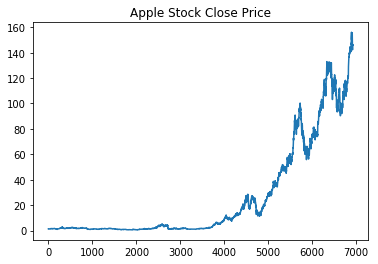

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(apple['Close'])
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Apple Stock Close Price')
plt.show()

## Observe the trends of Stock Volume

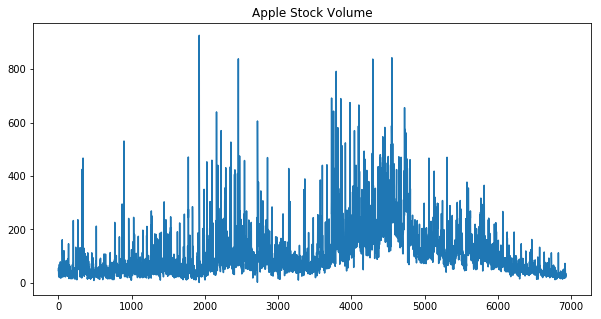

In [5]:
plt.plot(apple['Volume'])
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Apple Stock Volume')
plt.show()

## Split the dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(apple.iloc[:, 1:-1], apple.iloc[:, -1],
                                                    test_size = 0.3, random_state = 100)

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predict):
    return sqrt(mean_squared_error(actual, predict))

In [8]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)

rmse_lr = rmse(y_test, predict_lr)
print("Linear Regression Coef : ", model_lr.coef_)
print("Linear Regression RMSE : ", rmse_lr)

Linear Regression Coef :  [-0.00226971 -0.7702038   0.39038713 -0.0038079 ]
Linear Regression RMSE :  91.07464348248945


## Feature Engineering
- Gap : Open - Close
- High_Low_Range : High - Low

In [9]:
apple['Gap'] = apple['Open'] - apple['Close']
print('Rise : ', len(apple[apple['Gap'] > 0]))
print('Decline : ', len(apple[apple['Gap'] < 0]))
print('Flat : ', len(apple[apple['Gap'] == 0]))

Rise :  3162
Decline :  3137
Flat :  627


In [10]:
apple['High_Low_Range'] = apple['High'] - apple['Low']
apple['High_Low_Range'].describe()

count    6926.000000
mean        0.535478
std         0.822066
min         0.004400
25%         0.047800
50%         0.119650
75%         0.771400
max        16.800000
Name: High_Low_Range, dtype: float64

In [11]:
apple.head()

,Date,Open,High,Low,Close,Volume,Gap,High_Low_Range
0,1990-01-02,1.3304,1.3393,1.2500,1.3304,45.80,0.0,0.0893
1,1990-01-03,1.3393,1.3571,1.3393,1.3393,52.00,0.0,0.0178
2,1990-01-04,1.3437,1.3839,1.3304,1.3437,55.38,0.0,0.0535
3,1990-01-05,1.3482,1.3661,1.3214,1.3482,30.83,0.0,0.0447
4,1990-01-08,1.3571,1.3571,1.3214,1.3571,25.39,0.0,0.0357


In [12]:
# Rearrange the columns
cols = apple.columns.tolist()
cols = cols[:5] + cols[6:] + cols[5:6]
apple = apple[cols]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(apple.iloc[:, 1:-1], apple.iloc[:, -1],
                                                    test_size = 0.3, random_state = 100)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)
mse_lr = rmse(y_test, predict_lr)
print("Linear Regression Coef : ", model_lr.coef_)
print("Linear Regression RMSE : ", mse_lr)

Linear Regression Coef :  [  1.78526226e+23  -3.68344078e+24   5.89972722e+24  -1.22371703e+24
   1.43083928e+39   2.53422742e+41]
Linear Regression RMSE :  2.031311381839084e+41


- The result seems awkward that even after feature engineering, the RMSE is still equilvalent.

## Other Linear Regression Model

In [15]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
predict_lasso = model_lasso.predict(X_test)
rmse_lasso = rmse(y_test, predict_lasso)
print("Lasso Coef : ", model_lasso.coef_)
print("Lasso RMSE : ", rmse_lasso)

Lasso Coef :  [ -0.60995675  -0.08864074  -0.45257802  -0.           0.          53.06913748]
Lasso RMSE :  85.27573710132238


## Non-linear Model : Random Forest & XGBoost
### Random Forest, yet to fine tuning

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 10)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
rmse_rf = rmse(y_test, predict_rf)

print("Random Forest RMSE : ", rmse_rf)

Random Forest RMSE :  60.21240578717898


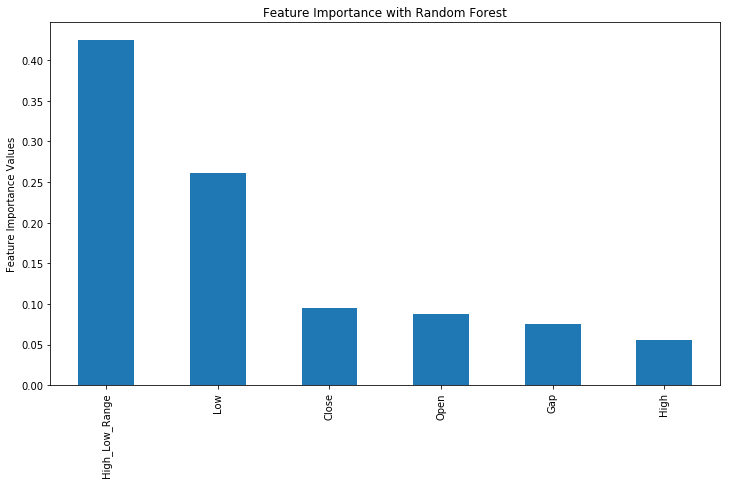

In [32]:
imp_features = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_features.plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance Values')
plt.subplots_adjust(bottom=0.25)
plt.show()

### XGBoost, yet to fine tuning

In [38]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

params = {
    'objective' : 'reg:linear',
    'eval_metric' : 'rmse',
    'silent' : 1,
    'eta' : 0.3,
    'early_stopping_rounds' : 5
}

num_rounds = 10

watchlist  = [(dtrain,'train'), (dtest,'test')]
model_xgb = xgb.train(params, dtrain, num_rounds, watchlist)

predict_xgb = model_xgb.predict(dtest)

[0]	train-rmse:105.464	test-rmse:107.35
[1]	train-rmse:83.2371	test-rmse:87.5545
[2]	train-rmse:69.0931	test-rmse:75.5442
[3]	train-rmse:60.171	test-rmse:68.6612
[4]	train-rmse:54.7623	test-rmse:64.665
[5]	train-rmse:51.2688	test-rmse:62.7069
[6]	train-rmse:49.1772	test-rmse:61.5891
[7]	train-rmse:46.9391	test-rmse:60.998
[8]	train-rmse:45.6712	test-rmse:60.6369
[9]	train-rmse:44.7434	test-rmse:60.6339


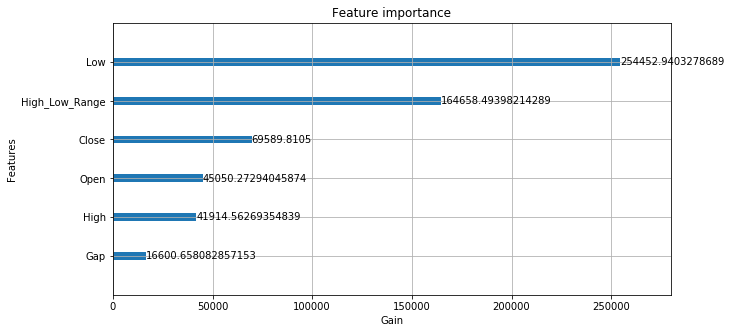

In [35]:
xgb.plot_importance(model_xgb, importance_type='gain', xlabel='Gain')

## Prediction Observation

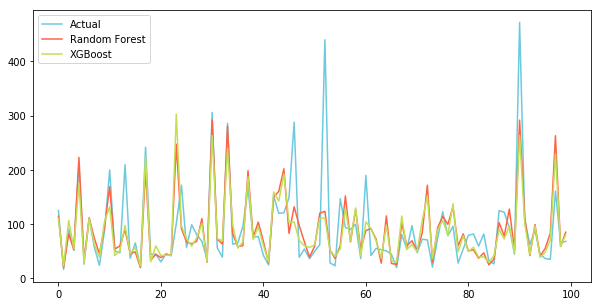

In [42]:
range_num = 100

plt.plot(y_test.values[:range_num], color = '#6dc9dd', label = "Actual")
plt.plot(predict_rf[:range_num], color = '#ff6347', label = "Random Forest")
plt.plot(predict_xgb[:range_num], color = '#c2df55', label = 'XGBoost')
#plt.plot(predict_lasso[:range_num], color = '#c2df55', label = 'Lasso')

plt.legend()
plt.show()